# УЭЦН - электрика

версия 0.2 от 06.10.2021

Хабибуллин Ринат


Материалы для лекции. 

Для подготовки слайдов в формате html необходимо выполнить в терминале команду

`jupyter nbconvert Jupyter\ .\50_ESP_electric_slides.ipynb --to slides --post serve`

возможно в команде потребуется поставить другое имя файла вместо `.\50_ESP_electric_slides.ipynb`

картинки загружены в виде вложений в ячейки.

 Схема установки УЭЦН. Покажите потоки флюидов и энергии на схеме.
 


 Схема установки УЭЦН. Все ли обозначения отображены?
 
 

#### Что полезного может дать мониторинг потребления электроэнергии для установки УЭЦН?

* Энергоэффективность 
* Цифровой двойник
    * Диагностика состояния ЭЦН
    * Выявление аномалий при эксплуатации
    * Восстановление скрытых параметров

Критичным для УЭЦН является гидравлика - она определяет дебит нефти. 

Электрика вторична по важности, если все правильно подобрано, то проблем не должно быть. 
Но рассматривая вопросы второго порядка по эффективности эксплуатации - там есть что посмотреть.

In [3]:
# импорт библиотек, чтобы потом рисовать графики
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
#import plotly.graph_objects as go
import numpy as np
import json

plt.rcParams["figure.figsize"] = (10,8)

In [4]:
# Определим некоторые параметры для построения иллюстраций
eff_CS = 0.95      # КПД станции управления УЭЦН
eff_tr = 0.95      # КПД трансформатора повышающего
eff_cable = 0.95   # КПД кабельной линии
eff_motor = 0.85   # КПД погружного электрического двигателя
eff_pump = 0.5     # КПД центробежного насоса
N_input_kW = 30     # входная электрическая мощность

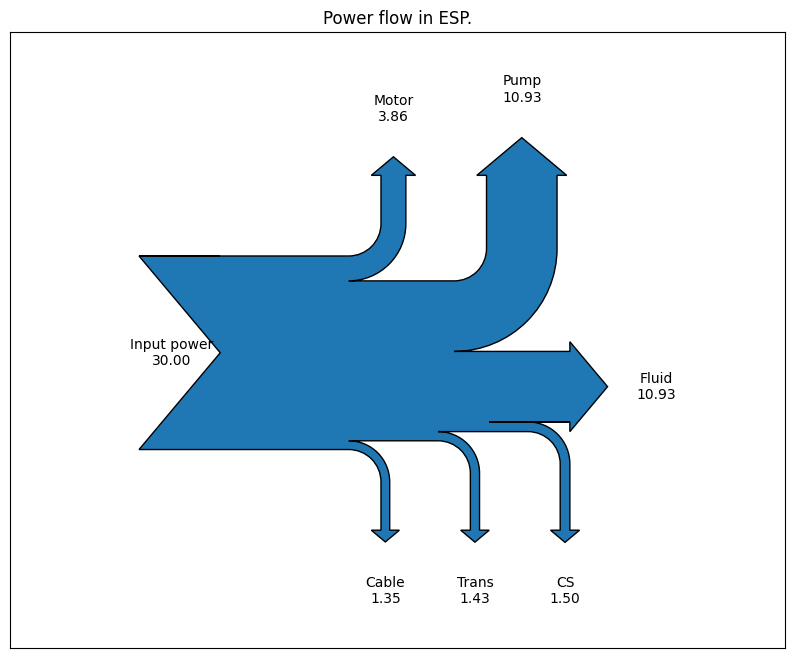

In [5]:
# построим диаграмму потоков энергии
Sankey(flows=[N_input_kW,
              -N_input_kW * (1 - eff_CS),
              -N_input_kW * eff_CS * (1 - eff_tr),
              -N_input_kW * eff_CS * eff_tr * (1 - eff_cable),
              -N_input_kW * eff_CS * eff_tr * eff_cable * (1 - eff_motor),
              -N_input_kW * eff_CS * eff_tr * eff_cable * eff_motor * (1 - eff_pump),
              -N_input_kW * eff_CS * eff_tr * eff_cable * eff_motor * eff_pump   ],
       labels=[ 'Input power', 'CS', 'Trans', 'Cable', 'Motor', 'Pump', 'Fluid'],
       orientations=[ 0, -1, -1, -1, 1, 1, 0],
       format='%.2f', scale=0.02).finish()
plt.title("Power flow in ESP.")
plt.show()

In [16]:
import os
print(os.path.abspath(".."))

#print(os.path.pardir(os.path.abspath("")))

c:\unifloc\unifloc_vba


In [18]:
"""
Пример автоматического определения путей для примера поставляемого с Unifloc VBA
работает, только если расчетный файл находится во вложенной папке относительно надстройки.
Для других вариантов расположения расчетного файла - ссылки на папки надо модифицировать
""" 

import os
import sys
import inspect

#current_path = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
current_path = ".."
print('Текущая папка где находится скрипт python -- '+ current_path)

# все примеры находятся во вложенной папке репозитория Unifloc VBA 
# поэтому здесь определяется путь к папке репозитория Unifloc VBA 
# если надо - подмените путь здесь на свой
unifloc_path = os.path.abspath(current_path)
print('Путь к папке Unifloc VBA -- '+ unifloc_path)

unifloc_xlam = unifloc_path +'\\UniflocVBA_7.xlam'
print('Путь к надстройке Unifloc VBA -- '+ unifloc_xlam)

# добавим в путь поиска пакетов python папку где находится репозиторий Unifloc VBA
sys.path.insert(0, unifloc_path) 
# импортируем python_api для Unifloc VBA
import unifloc_vba_python_api.python_api as unifloc
# создаем объект имеющий доступ к расчетам Unifloc VBA
unf = unifloc.API(unifloc_xlam)

Текущая папка где находится скрипт python -- ..
Путь к папке Unifloc VBA -- c:\unifloc\unifloc_vba
Путь к надстройке Unifloc VBA -- c:\unifloc\unifloc_vba\UniflocVBA_7.xlam


In [19]:
# зададим параметры кабеля и ПЭД для построения последующих характеристик
cable_json=unf.encode_ESP_cable()
print('Параметры кабеля:')
print(json.dumps(json.loads(cable_json), sort_keys=True, indent=4))

motor_ID = 1
U_nom = 1000
f_nom = 50
p_nom = 32
slip_nom = 0.02
eff_nom = 0.85
cos_phi_nom = 0.8

motor_json = unf.encode_ESP_motor(motor_ID, 
                                  P_nom_kW=p_nom, 
                                  U_nom_lin_V=U_nom, 
                                  f_nom_Hz=f_nom,
                                  eff_nom_fr=eff_nom,
                                  cosphi_nom_fr=cos_phi_nom,
                                  slip_nom_fr=slip_nom)

print('Параметры ПЭД:')
print(json.dumps(json.loads(motor_json), sort_keys=True, indent=4))

Параметры кабеля:
{
    "cable_R_Omkm": 1.18,
    "cable_X_Omkm": 0.01,
    "cable_t_max_C": 120,
    "d_mm": 16,
    "length_m": 1000,
    "manufacturer": "default",
    "name": "default_name"
}
Параметры ПЭД:
{
    "F_nom_Hz": 50,
    "P_nom_kW": 32,
    "U_nom_lin_V": 1000,
    "cosphi_nom_fr": 0.8,
    "eff_nom_fr": 0.85,
    "f_surf_Hz": 50,
    "motor_ID": 1,
    "power_fact_kW": 30,
    "slip_nom_fr": 0.02
}


In [20]:
help(unf.encode_ESP_motor)

Help on method encode_ESP_motor in module unifloc_vba_python_api.python_api:

encode_ESP_motor(motor_ID=0, P_nom_kW=30, U_nom_lin_V=1000, f_nom_Hz=50, eff_nom_fr=0.82, cosphi_nom_fr=0.88, slip_nom_fr=0.053, f_surf_Hz=50, power_fact_kW=30, d_od_mm=0, lambda_=0, alpha0=0, xi0=0, Ixcf=0) method of unifloc_vba_python_api.python_api.API instance
    ========== description ============== 
    функция кодирования параметров ПЭД в строку 
           
    ==========  arguments  ============== 
    
       motor_id - тип 0 - постоянные значения,  1 - задается по каталожным кривым, ассинхронный  2 - задается по схеме замещения, ассинхронный    
    
       p_nom_kw - номинальная мощность двигателя квт    
    
       u_nom_lin_v - номинальное напряжение двигателя, линейное, в    
    
       f_nom_hz - номинальная частота тока, гц    
    
       eff_nom_fr - кпд при номинальном режиме работы    
    
       cosphi_nom_fr - коэффициент мощности при номинальный    
    
       slip_nom_fr - скольж

In [21]:
def motor_param(mom_Nm=2, freq_Hz=50, U_V=1000, motor_json='', cable_json='', key = ''):
    _ESP_calc_mom_ = np.vectorize(unf.ESP_motor_calc_mom)
    res = _ESP_calc_mom_(mom_Nm, freq_Hz, U_V, motor_json, cable_json)
    if res.ndim == 0:
        return json.loads(str(res))[key]
    else:
        return np.array([json.loads(str(resi))[key] for resi in res])

In [22]:
M_max_Nm = 100
m_arr = np.arange(1,M_max_Nm, M_max_Nm / 50)

i_arr = motor_param(mom_Nm=m_arr, freq_Hz=50, U_V=1000, motor_json=motor_json, cable_json=cable_json, key='I_lin_A')
eff_arr = motor_param(mom_Nm=m_arr, freq_Hz=50, U_V=1000, motor_json=motor_json, cable_json=cable_json, key='eff_d')
slip_arr = motor_param(mom_Nm=m_arr, freq_Hz=50, U_V=1000, motor_json=motor_json, cable_json=cable_json, key='s_d')
cos_phi_arr = motor_param(mom_Nm=m_arr, freq_Hz=50, U_V=1000, motor_json=motor_json, cable_json=cable_json, key='CosPhi_d')

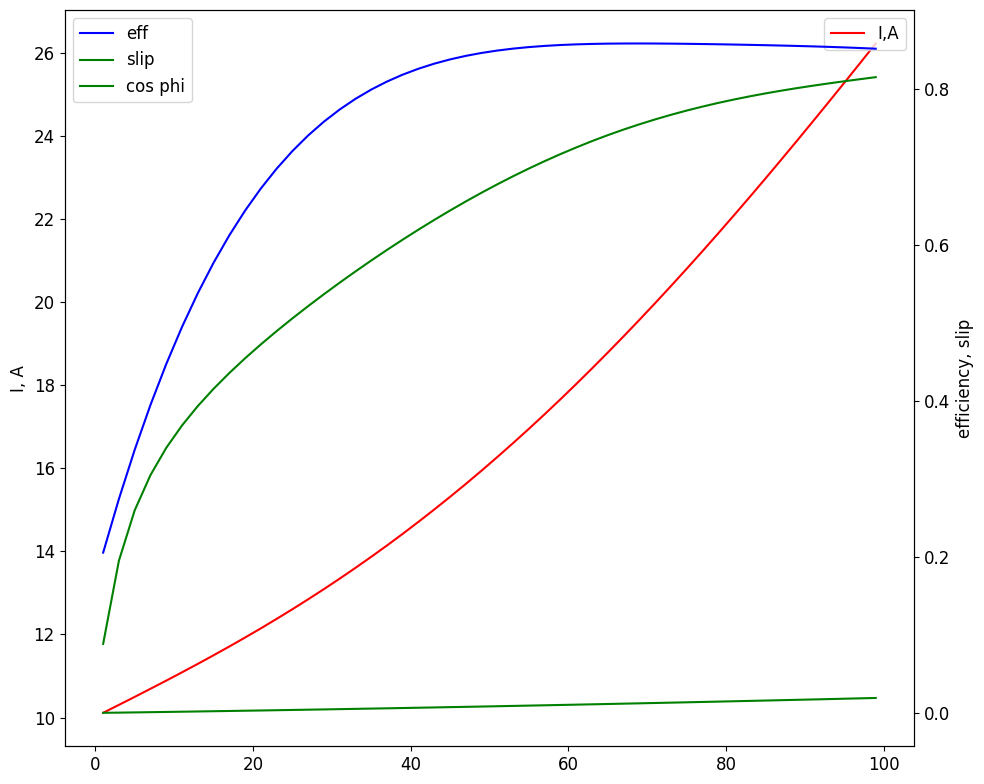

In [23]:
# построение графика с характеристикой ПЭД
plt.rcParams.update({'font.size': 12})

fig, ax1 = plt.subplots()
ax1.plot(m_arr, i_arr, color='red', label='I,A')
ax1.set_ylabel('I, A') 


ax2 = ax1.twinx()
ax2.set_ylabel('efficiency, slip') 
ax2.plot(m_arr, eff_arr, color='blue', label='eff')
ax2.plot(m_arr, slip_arr, color='green', label='slip')
ax2.plot(m_arr, cos_phi_arr, color='green', label='cos phi')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax2.legend(loc='upper left')
ax1.legend(loc='upper right')
plt.show()